In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#for style in plt.style.available:
#    print(style)

In [3]:
paragens = pd.read_csv("data/paragens.csv", sep=';').dropna()
paragens

gid   latitude  longitude Estado de Conservacao     Tipo de Abrigo  \
0     79 -107011.55  -95214.57                   Bom  Fechado dos Lados   
1    593 -103777.02  -94637.67                   Bom         Sem Abrigo   
2    499 -103758.44  -94393.36                   Bom  Fechado dos Lados   
3    494 -106803.20  -96265.84                   Bom         Sem Abrigo   
4    480 -106757.30  -96240.22                   Bom         Sem Abrigo   
..   ...        ...        ...                   ...                ...   
803  475 -106826.16  -96699.81                   Bom         Sem Abrigo   
804  474 -106880.09  -96852.94                   Bom         Sem Abrigo   
805  463 -106886.32  -96345.37                   Bom         Sem Abrigo   
806    8 -106980.35  -95289.30                   Bom         Sem Abrigo   
807    5 -106997.31  -95311.49                   Bom         Sem Abrigo   

    Abrigo com Publicidade? Operadora Carreira  Codigo de Rua  \
0                       Yes    Vimeca       01            103   
1                        No    Vimeca       01            300   
2                       Yes    Vimeca       01            300   
3                        No    Vimeca       01            389   
4                        No    Vimeca       01            389   
..                      ...       ...      ...            ...   
803                      No    Carris      776            386   
804                      No    Carris      776            386   
805                      No    Carris      776            386   
806                      No    Carris      776            103   
807                      No    Carris      776            103   

                Nome da Rua                                     Freguesia  
0        Rua Damiao de Gois  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
1    Avenida dos Cavaleiros                           Carnaxide e Queijas  
2    Avenida dos Cavaleiros                           Carnaxide e Queijas  
3      Rua Sao Joao de Deus  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
4      Rua Sao Joao de Deus  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
..                      ...                                           ...  
803     Rua Sacadura Cabral  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
804     Rua Sacadura Cabral  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
805     Rua Sacadura Cabral  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
806      Rua Damiao de Gois  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
807      Rua Damiao de Gois  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  

[800 rows x 11 columns]

In [4]:
paragens["Estado de Conservacao"].describe()

count     800
unique      3
top       Bom
freq      791
Name: Estado de Conservacao, dtype: object

In [5]:
paragens["Freguesia"].value_counts()

Oeiras e Sao Juliao da Barra, Paco de Arcos e Caxias    226
Alges, Linda-a-Velha e Cruz Quebrada-Dafundo            186
Carnaxide e Queijas                                     168
Porto Salvo                                             115
Barcarena                                               105
Name: Freguesia, dtype: int64

In [6]:
print(pd.crosstab(paragens["Freguesia"], paragens["Operadora"], margins=True).to_markdown())

| Freguesia                                            |   Carris |   LT |   SCoTTURB |   Vimeca |   All |
|:-----------------------------------------------------|---------:|-----:|-----------:|---------:|------:|
| Alges, Linda-a-Velha e Cruz Quebrada-Dafundo         |       42 |   39 |          2 |      103 |   186 |
| Barcarena                                            |        4 |   80 |          2 |       19 |   105 |
| Carnaxide e Queijas                                  |       13 |   63 |          5 |       87 |   168 |
| Oeiras e Sao Juliao da Barra, Paco de Arcos e Caxias |        1 |  177 |         44 |        4 |   226 |
| Porto Salvo                                          |        2 |   88 |          3 |       22 |   115 |
| All                                                  |       62 |  447 |         56 |      235 |   800 |


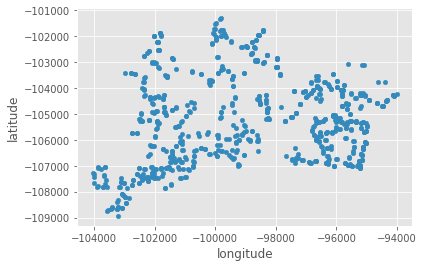

In [7]:
paragens.plot.scatter(x='longitude', y='latitude')
plt.savefig('figures/points_scatter.png', dpi=200)

In [8]:
paragens["Estado de Conservacao"].unique()

array(['Bom', 'Mau', 'Razoavel'], dtype=object)

In [9]:
paragens["Estado de Conservacao"].value_counts()

Bom         791
Razoavel      6
Mau           3
Name: Estado de Conservacao, dtype: int64

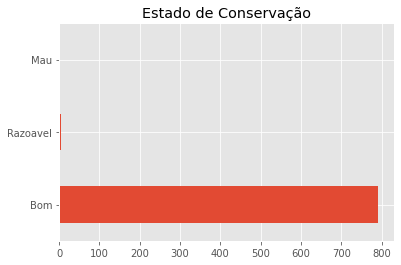

In [10]:
paragens["Estado de Conservacao"].value_counts().plot.barh(title="Estado de Conservação")
plt.savefig("figures/state_barh.png", dpi=200)

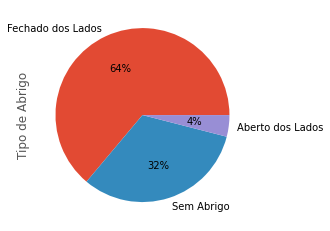

In [11]:
paragens["Tipo de Abrigo"].value_counts().plot.pie(autopct='%1.0f%%')
plt.savefig("figures/shelter_pie.png", dpi=200)

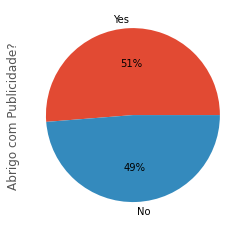

In [12]:
paragens["Abrigo com Publicidade?"].value_counts().plot.pie(autopct='%1.0f%%')
plt.savefig("figures/ads_pie.png", dpi=200)

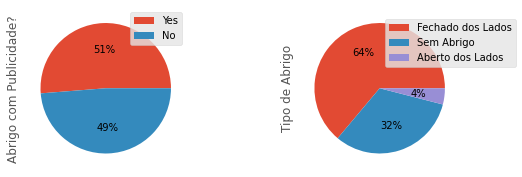

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

axs[0].pie(paragens["Abrigo com Publicidade?"].value_counts(), autopct='%1.0f%%')
axs[0].set_ylabel("Abrigo com Publicidade?")
axs[0].legend(paragens["Abrigo com Publicidade?"].value_counts().keys())

axs[1].pie(paragens["Tipo de Abrigo"].value_counts(), autopct='%1.0f%%')
axs[1].set_ylabel("Tipo de Abrigo")
axs[1].legend(paragens["Tipo de Abrigo"].value_counts().keys(),loc='best', bbox_to_anchor=(0.5, 0.6))

fig.savefig("figures/ads_and_shelter_pie.png", dpi=200)

In [14]:
paragens["Abrigo com Publicidade?"].value_counts().keys()

Index(['Yes', 'No'], dtype='object')

In [15]:
print(paragens["Operadora"].value_counts().to_markdown(headers=['Operadora', 'Nº Paragens']))

| Operadora   |   Nº Paragens |
|:------------|--------------:|
| LT          |           447 |
| Vimeca      |           235 |
| Carris      |            62 |
| SCoTTURB    |            56 |


In [16]:
carreiras = pd.read_csv("data/adjacencias.csv", sep=';').dropna()
carreiras

gid   latitude  longitude Estado de Conservacao     Tipo de Abrigo  \
0     183 -103678.36  -96590.26                   Bom  Fechado dos Lados   
1     791 -103705.46  -96673.60                   Bom   Aberto dos Lados   
2     595 -103725.69  -95975.20                   Bom  Fechado dos Lados   
3     182 -103746.76  -96396.66                   Bom  Fechado dos Lados   
4     499 -103758.44  -94393.36                   Bom  Fechado dos Lados   
...   ...        ...        ...                   ...                ...   
1556  187 -106985.92  -95598.80                   Bom         Sem Abrigo   
1557    5 -106997.31  -95311.49                   Bom         Sem Abrigo   
1558  895 -106999.08  -96066.10                   Bom  Fechado dos Lados   
1559  897 -107004.52  -96080.98                   Bom  Fechado dos Lados   
1560  681 -107008.56  -95490.23                   Bom  Fechado dos Lados   

     Abrigo com Publicidade? Operadora  Carreira  Codigo de Rua  \
0                        Yes    Vimeca         1            286   
1                        Yes    Vimeca         1            286   
2                        Yes    Vimeca         1            354   
3                        Yes  SCoTTURB         1            286   
4                        Yes    Vimeca         1            300   
...                      ...       ...       ...            ...   
1556                      No    Carris       776            118   
1557                      No    Carris       776            103   
1558                      No    Carris       776            369   
1559                      No    Carris       776            369   
1560                      No    Carris       776            118   

                    Nome da Rua                                     Freguesia  
0          Rua Aquilino Ribeiro                           Carnaxide e Queijas  
1          Rua Aquilino Ribeiro                           Carnaxide e Queijas  
2     Rua Manuel Teixeira Gomes                           Carnaxide e Queijas  
3          Rua Aquilino Ribeiro                           Carnaxide e Queijas  
4        Avenida dos Cavaleiros                           Carnaxide e Queijas  
...                         ...                                           ...  
1556    Alameda Hermano Patrone  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
1557         Rua Damiao de Gois  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
1558     Rua Direita do Dafundo  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
1559     Rua Direita do Dafundo  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  
1560    Alameda Hermano Patrone  Alges, Linda-a-Velha e Cruz Quebrada-Dafundo  

[1545 rows x 11 columns]

In [17]:
carreiras['Carreira'].unique()

array([  1,   2,   6,   7,  10,  11,  12,  13,  15,  23, 101, 102, 106,
       108, 111, 112, 114, 115, 116, 117, 119, 122, 125, 129, 158, 162,
       171, 184, 201, 467, 468, 470, 471, 479, 714, 748, 750, 751, 776])

In [18]:
print(carreiras['Carreira'].value_counts().to_markdown(headers=['Carreira', 'Nº Paragens']))

|   Carreira |   Nº Paragens |
|-----------:|--------------:|
|         13 |           102 |
|         15 |            95 |
|          1 |            76 |
|          2 |            76 |
|        158 |            74 |
|         12 |            68 |
|        106 |            63 |
|         10 |            62 |
|        122 |            61 |
|        117 |            60 |
|        115 |            55 |
|        102 |            53 |
|        119 |            52 |
|        108 |            48 |
|        171 |            45 |
|        125 |            45 |
|        114 |            45 |
|        184 |            44 |
|        111 |            42 |
|        112 |            42 |
|          6 |            37 |
|        129 |            36 |
|         11 |            35 |
|        471 |            22 |
|        101 |            22 |
|        751 |            21 |
|        201 |            20 |
|        776 |            20 |
|          7 |            18 |
|        162 |            17 |
|       